### 10.4 텐서플로를 이용하여 단순 RNN 모델 만들기

In [30]:
import numpy as np

size, seq_len = 100, 3
# 비어있는 넘파이 배열을 생성한다.
X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

In [31]:
import numpy as np

size, seq_len = 100, 3
# 비어있는 넘파이 배열을 생성한다.
#간단한생성된 X에는 시퀀스 데이터가 있으며, Y에는 실수 레이블 값이 있는 구조

X = np.empty(shape=(size, seq_len, 1))
Y = np.empty(shape=(size,))

for i in range(size):
    # [0, 0.1, 0.2], [0.1, 0.2, 0.3] 같은 시퀀스를 만든다
    c = np.linspace(i/10., (i+seq_len-1)/10., seq_len)
    X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
    Y[i] = (i+seq_len) / 10   # 목표값을 생성함

for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]] 0.3
[[0.1]
 [0.2]
 [0.3]] 0.4
[[0.2]
 [0.3]
 [0.4]] 0.5
[[0.3]
 [0.4]
 [0.5]] 0.6
[[0.4]
 [0.5]
 [0.6]] 0.7
[[0.5]
 [0.6]
 [0.7]] 0.8
[[0.6]
 [0.7]
 [0.8]] 0.9
[[0.7]
 [0.8]
 [0.9]] 1.0
[[0.8]
 [0.9]
 [1. ]] 1.1
[[0.9]
 [1. ]
 [1.1]] 1.2
[[1. ]
 [1.1]
 [1.2]] 1.3
[[1.1]
 [1.2]
 [1.3]] 1.4
[[1.2]
 [1.3]
 [1.4]] 1.5
[[1.3]
 [1.4]
 [1.5]] 1.6
[[1.4]
 [1.5]
 [1.6]] 1.7
[[1.5]
 [1.6]
 [1.7]] 1.8
[[1.6]
 [1.7]
 [1.8]] 1.9
[[1.7]
 [1.8]
 [1.9]] 2.0
[[1.8]
 [1.9]
 [2. ]] 2.1
[[1.9]
 [2. ]
 [2.1]] 2.2
[[2. ]
 [2.1]
 [2.2]] 2.3
[[2.1]
 [2.2]
 [2.3]] 2.4
[[2.2]
 [2.3]
 [2.4]] 2.5
[[2.3]
 [2.4]
 [2.5]] 2.6
[[2.4]
 [2.5]
 [2.6]] 2.7
[[2.5]
 [2.6]
 [2.7]] 2.8
[[2.6]
 [2.7]
 [2.8]] 2.9
[[2.7]
 [2.8]
 [2.9]] 3.0
[[2.8]
 [2.9]
 [3. ]] 3.1
[[2.9]
 [3. ]
 [3.1]] 3.2
[[3. ]
 [3.1]
 [3.2]] 3.3
[[3.1]
 [3.2]
 [3.3]] 3.4
[[3.2]
 [3.3]
 [3.4]] 3.5
[[3.3]
 [3.4]
 [3.5]] 3.6
[[3.4]
 [3.5]
 [3.6]] 3.7
[[3.5]
 [3.6]
 [3.7]] 3.8
[[3.6]
 [3.7]
 [3.8]] 3.9
[[3.7]
 [3.8]
 [3.9]] 4.0
[[3.8]
 [3.9

 ✔  SimpleRNN 모델을 만들어서 입력값으로 X 시퀀스 값을 주고 정답값 Y를 잘 예측하는지 살펴보자


In [32]:
import tensorflow as tf
# units는 SimpleRNN 레이어에 있는 뉴런의 수
# return_sequences는 출력으로 시퀀스 전체를 출력할지 묻는 옵션
# input_shape [3, 1]에서 3는 timesteps, 1은 입력차원
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 20, return_sequences=False, #모두 20개의 레이어
                              input_shape=[3, 1]), 
    tf.keras.layers.Dense(1) #출력이 1인 밀집연결
])

model.compile(optimizer ='adam', loss = 'mse') # 최적화방법 : adam , 손실함수 지정
model.summary() #모델정보 출력

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 20)                440       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


### 10.5 RNN을 학습시켜 예측을 해 보자.

In [33]:
import matplotlib.pyplot as plt
history = model.fit(X, Y, epochs=300)
# 입력 시퀸스 X 정답시퀸스 Y

Epoch 1/300
4/4 [==============================] - 1s 2ms/step - loss: 56.9747
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 54.4854
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 52.0316
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 49.6380
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 47.2924
Epoch 6/300
4/4 [==============================] - 0s 998us/step - loss: 44.9097
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 42.5358
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 40.1933
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 37.8751
Epoch 10/300
4/4 [==============================] - 0s 1ms/step - loss: 35.6480
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 33.3700
Epoch 12/300
4/4 [==============================] - 0s 1ms/step - loss: 31.2254
Epoch 13/300
4/4 [=============================

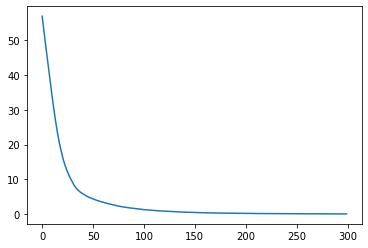

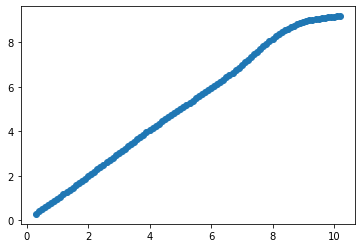

In [34]:
plt.plot(history.history['loss'])
plt.show()
y_hat = model.predict(X)
plt.scatter(Y, y_hat)
plt.show()

In [35]:
print(model.predict(np.array([[[10.2], [10.3], [10.4]]]))) #아직 다루지않은 입력 시퀸스 데이터를 받으면 예측이 더 어려울 것이다.
print(model.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[9.195625]]
[[9.206287]]


In [36]:
# 유닛의 수를 256개로 대폭 늘여서 개선된 모델
model256 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 256, return_sequences=False,
                              input_shape=[3, 1]),
    tf.keras.layers.Dense(1)
])

model256.compile(optimizer ='adam', loss = 'mse')
model256.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 66,305
Trainable params: 66,305
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 3/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 9.4949e-04
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 7.0224e-04
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 4.3556e-04
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 4.2896e-04
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 4.1125e-04
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 5.5346e-04
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 7.3645e-04
Epoch 13/300
4/4 [===============

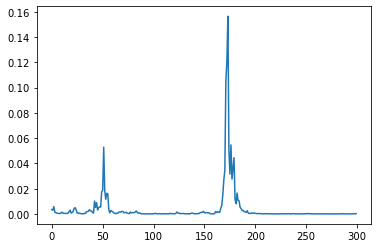

In [40]:
history = model256.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])



In [41]:
print(model256.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model256.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[10.450397]]
[[10.633113]]


### 10.6 RNN을 다층구조로 만들어 적은 수의 파라미터로 좋은 성능을 내자

In [42]:
import tensorflow as tf

model_multilayer = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units = 34, input_shape=[3, 1],
                                          return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34, return_sequences=True),
    tf.keras.layers.SimpleRNN(units = 34),
    tf.keras.layers.Dense(1) ])
model_multilayer.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 3, 34)             1224      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 3, 34)             2346      
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 34)                2346      
                                                                 
 dense_5 (Dense)             (None, 1)                 35        
                                                                 
Total params: 8,297
Trainable params: 8,297
Non-trainable params: 0
_________________________________________________________________


Epoch 1/300
4/4 [==============================] - 1s 3ms/step - loss: 25.7114
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 15.1883
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 10.9515
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 8.9102
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 7.7584
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 7.0011
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 6.5079
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 5.9888
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 5.3559
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 4.7193
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 4.1400
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 3.5913
Epoch 13/300
4/4 [==============================] - 0s 2ms

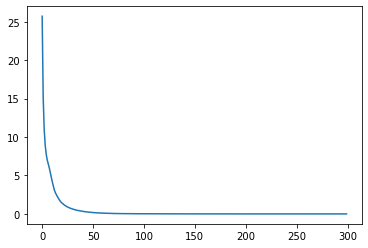

In [43]:
model_multilayer.compile(optimizer ='adam', loss = 'mse')
history = model_multilayer.fit(X, Y, epochs=300)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

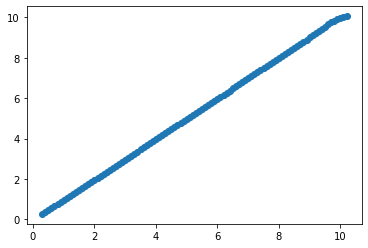

In [44]:
y_hat = model_multilayer.predict(X)
plt.scatter(Y, y_hat)

In [45]:
print(model_multilayer.predict(np.array([[[10.2], [10.3], [10.4]]])))
print(model_multilayer.predict(np.array([[[10.4], [10.5], [10.6]]])))

[[10.131352]]
[[10.1582155]]


### 10.12 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 시퀀스 데이터 준비

In [46]:
import numpy as np

# 0.0, 0.1, .. 증가하는 시퀀스 데이터를 생성함
# seq_len 길이를 가지는 시퀀스 데이터를 size 갯수만큼 생성한다
def sequence_gen(size, seq_len):
    # 비어있는 넘파이 배열을 생성한다.
    seq_X = np.empty(shape=(size, seq_len, 1))
    Y = np.empty(shape=(size,))

    for i in range(size):
        # [0, 0.1, 0.2, .. ]같은 시퀀스와 Y 값을 size 갯수만큼 생성
        c = np.linspace(i/10, (i+seq_len-1)/10, seq_len)
        seq_X[i] = c[:, np.newaxis]   # 새로운 축을 하나 더 추가함
        Y[i] = (i+seq_len) / 10       # 목표값을 생성함

    return seq_X, Y

# 길이가 16인 시퀀스 8개를 훈련용으로 만든다
n, seq_len = 8, 16   
train_seq_X, train_Y = sequence_gen(n, seq_len)

In [47]:
print('훈련용 데이터')
for i in range(n):
    print(train_seq_X[i].flatten(), train_Y[i])

half_n, offset = int(n/2), 1.0
test_seq_X = train_seq_X[:half_n] + offset
test_Y = train_Y[:half_n] + offset

print('검증용 데이터')
for i in range(half_n):
    print(test_seq_X[i].flatten(), test_Y[i])

훈련용 데이터
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5] 1.6
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6] 1.7
[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7] 1.8
[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 1.9
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9] 2.0
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 2.1
[0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1] 2.2
[0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2] 2.3
검증용 데이터
[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5] 2.6
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6] 2.7
[1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 2.8
[1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8] 2.9


### 10.13 단순 RNN과 LSTM, GRU 모델의 비교 (1) - 성능 비교

In [48]:
import tensorflow as tf 
n_units = 256       #유닛의 갯수를 비교적 넉넉하게 지정하여 각 모델의 성능 비교
simpleRNN_model = tf.keras.Sequential([ #SimpleRNN 모델 생성
    tf.keras.layers.SimpleRNN(units = n_units, return_sequences=False, #units 레이어를 구성하는 유닛의 갯수 
                              input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer ='adam', loss = 'mse')
simpleRNN_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 438ms/step - loss: 10.8443
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 2.4588
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0875
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.4863
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7583
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2062
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1403
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3377
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1143
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0294
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.0614
Epoch 13/100
1/1 [==============================] - 0s 3ms

In [52]:
#이제 simpleRNN_model의 predict() 메소드에 테스터용 데이터를 넣어서 정답을 잘 예측하는가 살펴보도록 하자

result = simpleRNN_model.predict(test_seq_X) 
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.376511  2.4105172 2.4403327 2.4665444]
실제값 : [2.6 2.7 2.8 2.9]


In [50]:
#마지막으로 GRU 모델을 만들고 예측값과 실제값을 출력해 보도록하자

GRU_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units = n_units, return_sequences=False, 
                        input_shape=[seq_len, 1]),
    tf.keras.layers.Dense(1)
])

GRU_model.compile(optimizer ='adam', loss = 'mse')
GRU_model.fit(train_seq_X, train_Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 3.9874
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 2.9166
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 1.9863
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1894
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5455
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1145
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0171
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3105
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4755
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3599
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1783
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0547
Epoch 13/100
1/1 [==============================] - 0s 9ms/ste

In [51]:
#마지막으로 GRU_model의 predict() 메소드에 테스터용 데이터를 넣어서 정답을 잘 예측하는가 살펴보도록 하자

result = GRU_model.predict(test_seq_X)
result = result.flatten()
print('예측값 :', result)
print('실제값 :', test_Y)

예측값 : [2.5747495 2.6678824 2.7603493 2.8521423]
실제값 : [2.6 2.7 2.8 2.9]
